MAE: 76.42857142857144
MSE: 5891.326530612246
R2: 0.0


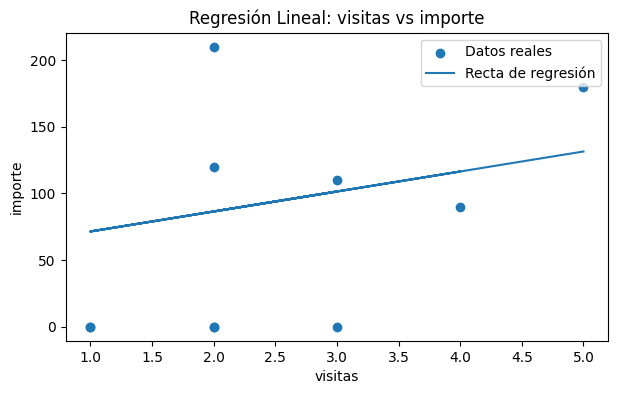

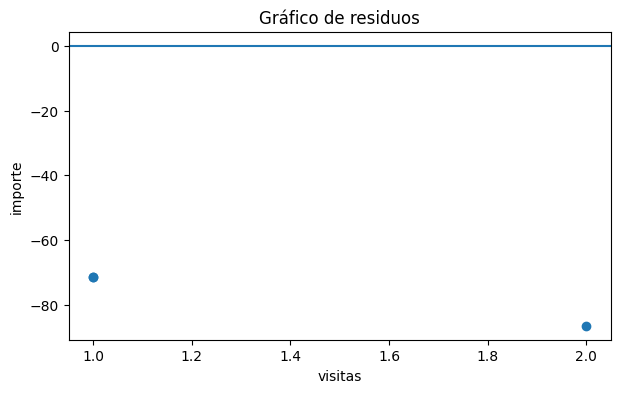

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# =========================
# Dataset 
# =========================
data = {
    "visitas": [2, 1, 4, 2, 3, 1, 2, 3, 2, 5],
    "fuente": ["ads", "org", "email", "org", "email", "org", "ads", "email", "org", "email"],
    "dispositivo": ["mob", "desk", "mob", "mob", "desk", "desk", "mob", "mob", "desk", "desk"],
    "desc": [1, 1, 1, 0, 1, 0, 1, 1, 1, 1],
    "items": [5, 2, 5, 7, 4, 1, 10, 5, 2, 8],
    "tiempo": [5, 1, 7, 7, 2, 3, 9, 5, 4, 8],
    "carrito": [1, 0, 1, 1, 1, 0, 1, 1, 1, 1],
    "compra": [1, 0, 1, 0, 1, 0, 1, 0, 0, 1],
    "importe": [120, 0, 90, 0, 110, 0, 210, 0, 0, 180]
}

df = pd.DataFrame(data)

#visitas, desc, items, tiempo

X = df[["visitas"]]      # variable predictora
y = df["importe"]      # variable a predecir


# =========================================
# 3️⃣ División Train/Test
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# =========================================
# 4️⃣ Entrenamiento del Modelo
# =========================================
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# =========================================
# 5️⃣ Predicción
# =========================================
y_pred = modelo.predict(X_test)

# =========================================
# 6️⃣ Métricas
# =========================================
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)
# =========================================
# 7️⃣ Gráfico: Predicciones vs Reales
# =========================================
plt.figure(figsize=(7,4))
plt.scatter(df["visitas"], df["importe"], label="Datos reales")
plt.plot(X, modelo.predict(X), label="Recta de regresión")
plt.xlabel("visitas")
plt.ylabel("importe")
plt.title("Regresión Lineal: visitas vs importe")
plt.legend()
plt.show()


# 7) Gráfico: residuos

residuos = y_test - y_pred

plt.figure(figsize=(7,4))
plt.scatter(X_test, residuos)
plt.axhline(0)
plt.xlabel("visitas")
plt.ylabel("importe")
plt.title("Gráfico de residuos")
plt.show()
